In [1]:
# Load stored variables
%store -r final_sales_df

## How long is the average delivery time in days? Has that changed over time?


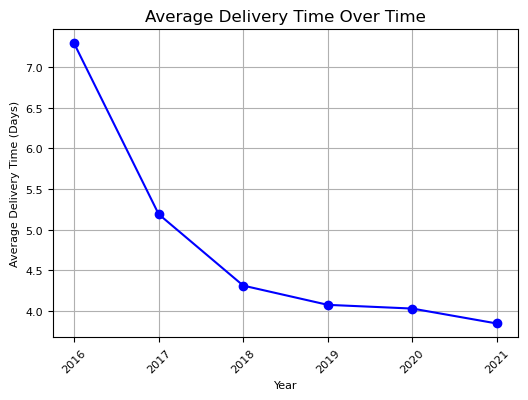

   Order Date  Delivery Time (Days)
0        2016              7.291128
1        2017              5.190815
2        2018              4.312840
3        2019              4.076268
4        2020              4.030559
5        2021              3.846847


In [9]:
import pandas as pd

# Convert 'Order Date' and 'Delivery Date' to datetime format
final_sales_df['Order Date'] = pd.to_datetime(final_sales_df['Order Date'])
final_sales_df['Delivery Date'] = pd.to_datetime(final_sales_df['Delivery Date'], errors='coerce')

# Create a new column 'Delivery Time in Days' by calculating the difference between delivery and order date
final_sales_df['Delivery Time (Days)'] = (final_sales_df['Delivery Date'] - final_sales_df['Order Date']).dt.days

# Remove any rows where delivery time is NaN (i.e., missing delivery date)
delivery_df = final_sales_df.dropna(subset=['Delivery Time (Days)'])

# Calculate the average delivery time by year
delivery_by_year = delivery_df.groupby(delivery_df['Order Date'].dt.year)['Delivery Time (Days)'].mean().reset_index()

# Plot the average delivery time over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(delivery_by_year['Order Date'], delivery_by_year['Delivery Time (Days)'], marker='o', color='b')
plt.title('Average Delivery Time Over Time', fontsize=12)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Average Delivery Time (Days)', fontsize=8)
plt.grid(True)
plt.yticks(fontsize=8)
plt.xticks(delivery_by_year['Order Date'], rotation=45, fontsize=8)
plt.show()

# Display the result
print(delivery_by_year)

In [23]:
print(f'{delivery_df['Delivery Time (Days)'].mean():.2f}')

4.53


#### The average delivery time in days is 4.53, which decreased year over year.